# Assignment 7


## Assignment 3 Preprocessing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns ; sns.set(style = "ticks", color_codes = True)
import pandas as pd
from IPython.display import display

#had to add the thousands argument for gdp per year to be int 
df = pd.read_csv('./Datasets/SuicideRatesOverview/master.csv', thousands=',')

#checking integrity of df
print(df.dtypes)
display(df)


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [2]:
#copying original data before modifying and exploring further
df2 = df.copy()

#country-year is redundant with country and year features so it is dropped
df2.drop(columns=['country-year'], inplace=True)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers


In [3]:
#checking for NaNs
print(df2.isnull().any())

display(df2.loc[df2['HDI for year'].isnull()])

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27755,Uzbekistan,2009,female,75+ years,7,318983,2.19,NaN,33689223673,1332,Silent
27756,Uzbekistan,2009,female,35-54 years,65,3263931,1.99,NaN,33689223673,1332,Boomers
27757,Uzbekistan,2009,female,55-74 years,15,1105076,1.36,NaN,33689223673,1332,Silent
27758,Uzbekistan,2009,male,5-14 years,37,2805898,1.32,NaN,33689223673,1332,Generation Z


In [4]:
#Majority of records don't have HDI for year, so dropping column
df2.drop(columns=['HDI for year'], inplace=True)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [5]:
#Checking for duplicates
df2['duplicated'] = df2.duplicated()
display(df2.loc[df2['duplicated']==True])

#no duplicates found so the added column is dropped
df2.drop(columns='duplicated', inplace=True)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,duplicated


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [6]:
#Obtaining information about data distribution for columns with numerical data
df2.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [7]:
#creating a classification for suicide rate based on me value above 
#because mean is skewed by potential outliers like the value 224.97
#high rate is 2, medium rate is 1, and low rate is 0
#high is 5.99 and greater, medium is from .92 to 5.99, and low is 0 to .92
rateVals = []
for x in df2['suicides/100k pop']:
    if x >= 5.99: 
        rateVals.append(2)
    elif x >= .92:
        rateVals.append(1)
    else:
        rateVals.append(0)
        
df2['suicide rate'] = rateVals

#Checking encoding around quartiles for anomalies
display(df2.loc[df2['suicides/100k pop'] >= 5.99])
display(df2.loc[df2['suicides/100k pop'] >= .92])
display(df2.loc[df2['suicides/100k pop'] < .92])

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,2
24,Albania,1989,male,75+ years,2,22500,8.89,2335124988,833,G.I. Generation,2
25,Albania,1989,male,25-34 years,18,283600,6.35,2335124988,833,Boomers,2
48,Albania,1993,male,15-24 years,18,243300,7.40,1228071038,437,Generation X,2
60,Albania,1994,male,75+ years,2,24600,8.13,1985673798,697,G.I. Generation,2
...,...,...,...,...,...,...,...,...,...,...,...
27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,63067077179,2309,Millenials,2
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,63067077179,2309,Millenials,2
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,63067077179,2309,Boomers,2
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,63067077179,2309,Millenials,2


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,2
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,1
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,1
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,1
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X,1
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent,1
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z,1
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z,1


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide rate
8,Albania,1987,male,55-74 years,1,137500,0.73,2156624900,796,G.I. Generation,0
9,Albania,1987,female,5-14 years,0,311000,0.00,2156624900,796,Generation X,0
10,Albania,1987,female,55-74 years,0,144600,0.00,2156624900,796,G.I. Generation,0
11,Albania,1987,male,5-14 years,0,338200,0.00,2156624900,796,Generation X,0
22,Albania,1988,female,5-14 years,0,317200,0.00,2126000000,769,Generation X,0
...,...,...,...,...,...,...,...,...,...,...,...
27723,Uzbekistan,2003,female,5-14 years,11,3085543,0.36,10128112401,441,Millenials,0
27735,Uzbekistan,2004,female,5-14 years,4,3031913,0.13,12030023548,516,Millenials,0
27747,Uzbekistan,2005,female,5-14 years,10,2970748,0.34,14307509839,606,Millenials,0
27759,Uzbekistan,2009,female,5-14 years,18,2678474,0.67,33689223673,1332,Generation Z,0


In [8]:
#One hot encoding sex, age, generation
df2 = pd.get_dummies(data = df2, columns = [col for col in df2.columns if (col != 'suicide rate' and df2[col].dtype == object)], drop_first=False)
display(df2)

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicide rate,country_Albania,country_Antigua and Barbuda,country_Argentina,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,2156624900,796,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,2156624900,796,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,2156624900,796,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,2156624900,796,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,3.28,2156624900,796,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,63067077179,2309,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
27816,2014,9,348465,2.58,63067077179,2309,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
27817,2014,60,2762158,2.17,63067077179,2309,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
27818,2014,44,2631600,1.67,63067077179,2309,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### For the original assignment 3 I omitted the features population and suicides_no because the target variable was derived from them. The feedback said I should rethink using suicides_no as a feature, so I am including it in this assignment. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

#Starting from a partially processed df2
display(df2)

#Features suicides/100k pop and population must be dropped
df2.drop(columns=['suicides/100k pop', 'population'], inplace=True)

#Need to remove target from other features
targets = pd.DataFrame(df2['suicide rate'].values, columns=['suicide rate'])
X = df2.drop(columns=['suicide rate'])

display(targets)
display(X)

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicide rate,country_Albania,country_Antigua and Barbuda,country_Argentina,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,2156624900,796,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,2156624900,796,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,2156624900,796,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,2156624900,796,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,3.28,2156624900,796,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,63067077179,2309,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
27816,2014,9,348465,2.58,63067077179,2309,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
27817,2014,60,2762158,2.17,63067077179,2309,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
27818,2014,44,2631600,1.67,63067077179,2309,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


,suicide rate
0,2
1,1
2,1
3,1
4,1
...,...
27815,1
27816,1
27817,1
27818,1


,year,suicides_no,gdp_for_year ($),gdp_per_capita ($),country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,2156624900,796,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,2156624900,796,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,14,2156624900,796,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,2156624900,796,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,2156624900,796,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,63067077179,2309,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
27816,2014,9,63067077179,2309,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
27817,2014,60,63067077179,2309,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
27818,2014,44,63067077179,2309,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [10]:
# Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, targets, test_size=.2, random_state=1)


## Question 1

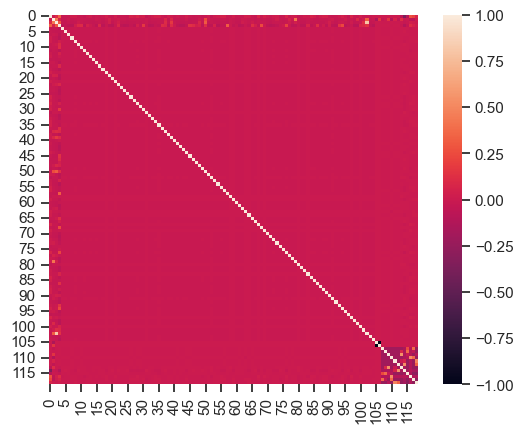

In [11]:
#checking correlation using correlation heatmap method from pg. 324 of our textbook
cm = np.corrcoef(X.values.T)
hm = sns.heatmap(cm, square = True)
plt.show()

In [12]:
#Let's see what those columns are and extract them for a finer comparison
print(X.columns[:4].values)
print(X.columns[105:].values)

corrDF = X.copy()
corrDF.drop(columns = X.columns[4:104].values, inplace=True)
display(corrDF)

['year' 'suicides_no' ' gdp_for_year ($) ' 'gdp_per_capita ($)']
['sex_female' 'sex_male' 'age_15-24 years' 'age_25-34 years'
 'age_35-54 years' 'age_5-14 years' 'age_55-74 years' 'age_75+ years'
 'generation_Boomers' 'generation_G.I. Generation'
 'generation_Generation X' 'generation_Generation Z'
 'generation_Millenials' 'generation_Silent']


,year,suicides_no,gdp_for_year ($),gdp_per_capita ($),country_Uzbekistan,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,2156624900,796,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,1987,16,2156624900,796,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1987,14,2156624900,796,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1987,1,2156624900,796,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,1987,9,2156624900,796,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,63067077179,2309,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
27816,2014,9,63067077179,2309,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
27817,2014,60,63067077179,2309,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
27818,2014,44,63067077179,2309,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0


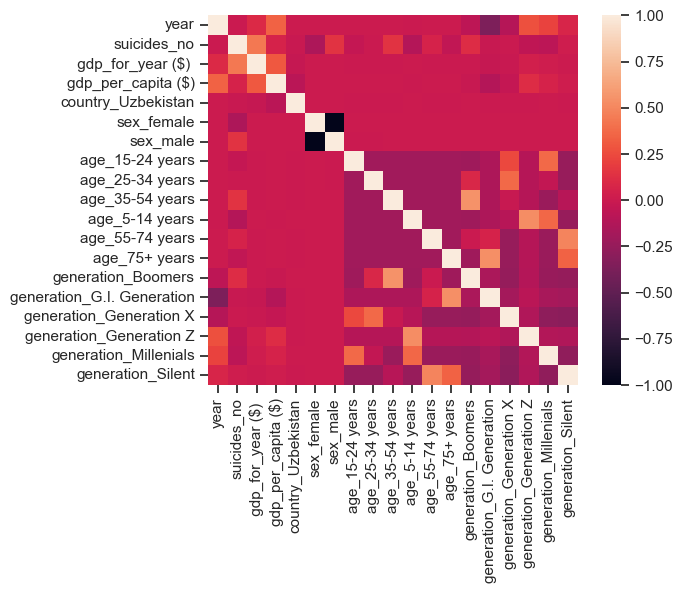

In [13]:
cm = np.corrcoef(corrDF.values.T)
hm = sns.heatmap(cm, square = True, xticklabels=corrDF.columns, yticklabels=corrDF.columns)
plt.show()

In [14]:
# set with men in the age range containing 20 from Gen X
m20GenX = X_test.loc[(X_test['age_15-24 years']==1) & (X_test['sex_male']==1) & (X_test['generation_Generation X']==1)]
m20GenXTargets = Y_test.loc[m20GenX.index]
display(m20GenX)
display(m20GenXTargets)

,year,suicides_no,gdp_for_year ($),gdp_per_capita ($),country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
19072,1990,440,65977749037,1876,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12083,1987,29,33961142322,10515,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7863,1999,138,19645272636,1805,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18292,1987,16,6827665300,3447,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27344,1997,49,23969823010,8012,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,1992,166,17037037037,1780,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14257,1996,1,31493987642,20076,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11734,1990,10,6372905073,27316,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11163,1996,14,705406001,1070,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


,suicide rate
19072,2
12083,2
7863,2
18292,2
27344,2
...,...
3216,2
14257,0
11734,2
11163,2


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

linPipe = make_pipeline(MinMaxScaler(), LinearRegression())

linPipe.fit(X_train, Y_train)

preds = linPipe.predict(m20GenX)

mae_pred = mean_absolute_error(m20GenXTargets, preds)

print(f'Men in the age range containing 20 from Gen X MAE: {mae_pred:.2f}')

Men in the age range containing 20 from Gen X MAE: 0.29


In [16]:
feature_names = linPipe[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    linPipe[-1].coef_.T,
    columns=["Coefficients"],
    index=feature_names,
)

display(coefs)

display(coefs.describe())

display(m20GenXTargets.describe())

,Coefficients
year,4.155733e-02
suicides_no,2.139660e-01
gdp_for_year ($),-2.762877e-02
gdp_per_capita ($),-2.659378e-01
country_Albania,1.297967e+12
...,...
generation_G.I. Generation,3.068594e+12
generation_Generation X,3.068594e+12
generation_Generation Z,3.068594e+12
generation_Millenials,3.068594e+12


,Coefficients
count,1.190000e+02
mean,1.367563e+12
std,2.214731e+12
min,-1.274377e+13
25%,1.297967e+12
50%,1.297967e+12
75%,1.297967e+12
max,6.453548e+12


,suicide rate
count,217.000000
mean,1.654378
std,0.649353
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


### Answer
There are 119 regressor coefficients in this model and the MAE of the predicition is 0.29. This value is rather meaningless because the target variable is a class based on suicide rates in the range [0, 2].

## Question 2 

Age values are imputed using the mean of the range (75+ is represented by 80), generation values are ordinal from oldest (lowest) to most recent (highest). Sex is binary, 0 female, 1 male. 

In [17]:
# Recreating the dataset
df3 = df.copy()

#country-year is redundant with country and year features so it is dropped
df3.drop(columns=['country-year'], inplace=True)
df3.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers


In [18]:
#Majority of records don't have HDI for year, so dropping column
df3.drop(columns=['HDI for year'], inplace=True)
df3.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [19]:
#Separting targets from features
targets2 = df3['suicides/100k pop']
targets2.head()

# dropping population and targets
df3.drop(columns=['suicides/100k pop', 'population'], inplace=True)
df3.head()

,country,year,sex,age,suicides_no,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,2156624900,796,Boomers


In [20]:
# checking values for age and generation
display(df3['age'].unique())

display(df3['generation'].unique())

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [21]:
# Ordinal mapping for these features 
genMap = {'G.I. Generation':0,
          'Silent':1,
          'Boomers':2,
          'Generation X':3,
          'Millenials':4,
          'Generation Z':5}

ageMap = {'5-14 years': 10,
          '15-24 years': 20, 
          '25-34 years': 30,
          '35-54 years': 40, 
          '55-74 years': 60,
          '75+ years': 80}

sexMap = {'female':0,
          'male':1}

df3['generation'] = df3['generation'].map(genMap)
df3['age'] = df3['age'].map(ageMap)
df3['sex'] = df3['sex'].map(sexMap)

In [22]:
#A dash of sanity
df3.head()

,country,year,sex,age,suicides_no,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,1,20,21,2156624900,796,3
1,Albania,1987,1,40,16,2156624900,796,1
2,Albania,1987,0,20,14,2156624900,796,3
3,Albania,1987,1,80,1,2156624900,796,0
4,Albania,1987,1,30,9,2156624900,796,2


In [23]:
#OHE of countries although the heat map shows they have low correlation coeffs
df3 = pd.get_dummies(data = df3, columns = ['country'], drop_first = False)
df3.head()

,year,sex,age,suicides_no,gdp_for_year ($),gdp_per_capita ($),generation,country_Albania,country_Antigua and Barbuda,country_Argentina,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,1,20,21,2156624900,796,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1987,1,40,16,2156624900,796,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1987,0,20,14,2156624900,796,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1987,1,80,1,2156624900,796,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1987,1,30,9,2156624900,796,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Repeating the testing and training dataset split using same random state
X2 = df3.copy()

# Training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, targets2, test_size=.2, random_state=1)

In [25]:
# set with men of age 20 from Gen X
m20GenX2 = X_test2.loc[(X_test2['age']==20) & (X_test2['sex']==1) & (X_test2['generation']==3)]
m20GenXTargets2 = Y_test2.loc[m20GenX2.index]
display(m20GenX2)
display(m20GenXTargets2)

,year,sex,age,suicides_no,gdp_for_year ($),gdp_per_capita ($),generation,country_Albania,country_Antigua and Barbuda,country_Argentina,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
19072,1990,1,20,440,65977749037,1876,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12083,1987,1,20,29,33961142322,10515,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7863,1999,1,20,138,19645272636,1805,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18292,1987,1,20,16,6827665300,3447,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27344,1997,1,20,49,23969823010,8012,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,1992,1,20,166,17037037037,1780,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14257,1996,1,20,1,31493987642,20076,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11734,1990,1,20,10,6372905073,27316,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11163,1996,1,20,14,705406001,1070,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


19072    16.17
12083     9.26
7863     11.29
18292     6.58
27344    18.03
         ...  
3216     23.42
14257     0.67
11734    46.73
11163    18.67
10814     5.34
Name: suicides/100k pop, Length: 217, dtype: float64

In [26]:
linPipe2 = make_pipeline(MinMaxScaler(), LinearRegression())

linPipe2.fit(X_train2, Y_train2)

preds2 = linPipe2.predict(m20GenX2)

mae_pred2 = mean_absolute_error(m20GenXTargets2, preds2)

print(f'Men of age 20 from Gen X MAE: {mae_pred2:.2f}')

Men of age 20 from Gen X MAE: 5.32


In [27]:
feature_names2 = linPipe2[:-1].get_feature_names_out()

coefs2 = pd.DataFrame(
    linPipe2[-1].coef_.T,
    columns=["Coefficients"],
    index=feature_names2,
)

display(coefs2)

display(coefs2.describe())

display(m20GenXTargets2.describe())

,Coefficients
year,-3.544748e+00
sex,1.359773e+01
age,2.185694e+01
suicides_no,1.062980e+02
gdp_for_year ($),-4.058302e+00
...,...
country_United Arab Emirates,8.876243e+12
country_United Kingdom,8.876243e+12
country_United States,8.876243e+12
country_Uruguay,8.876243e+12


,Coefficients
count,1.080000e+02
mean,8.300931e+12
std,2.195508e+12
min,-1.085939e+01
25%,8.876243e+12
50%,8.876243e+12
75%,8.876243e+12
max,8.876243e+12


count    217.000000
mean      13.854747
std       11.618844
min        0.000000
25%        6.200000
50%       11.290000
75%       18.170000
max       56.960000
Name: suicides/100k pop, dtype: float64

The MAE is 5.32 suicides per 100k population. This is far more interpretable and informative compared to the value from the previous model. There are 108 coefficients, 1 for each feature used in the model. The coefficient number could be reduced if I used some a regularization method like Ridge Regression or LASSO.

## Question 3

The MAE of 5.32 from the second model is greater than the value of .29 from the first, but that value is far more meaningful becasue it has a clear unit associated with it. The value may also be higher because outliers are affecting the model whereas that is not possible for the categorized rates from model 1. Below are graphs of the residuals to get a better visual grasp of the differences. 

In [28]:
# function for graphing residuals, from page 335 of textbook
def graphRes (gTruth, _preds):
    plt.scatter(_preds, _preds-gTruth, c = 'steelblue', marker = 'o', edgecolors='white')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color = 'black', lw = 2)
    plt.show()

Graphs of residuals below:

Model 1, one hot encoded features

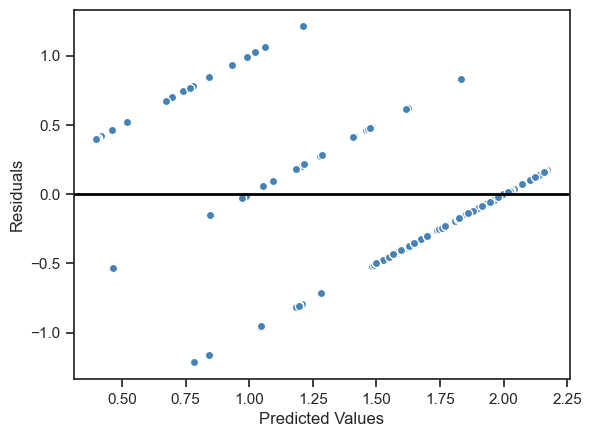

In [29]:
graphRes(gTruth = m20GenXTargets, _preds = preds)

Model 2, Numerical features

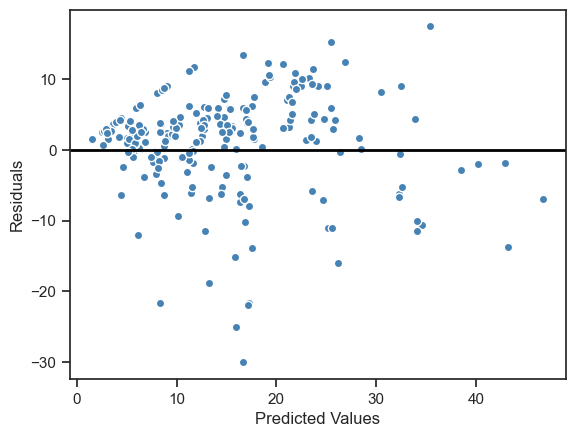

In [30]:
graphRes(gTruth = m20GenXTargets2, _preds = preds2)

Based on the residual plots, the first model shows a pattern in the distribution which is likely based on the classes of suicide rates. The second model shows a random distribution which is preferable. The targets in the second model were not standardized, so that is also effecting the MAE.

## Question 4

In [31]:
# Making a sample fitting the format of the training data
print(feature_names2)
print(len(feature_names2))

['year' 'sex' 'age' 'suicides_no' ' gdp_for_year ($) '
 'gdp_per_capita ($)' 'generation' 'country_Albania'
 'country_Antigua and Barbuda' 'country_Argentina' 'country_Armenia'
 'country_Aruba' 'country_Australia' 'country_Austria'
 'country_Azerbaijan' 'country_Bahamas' 'country_Bahrain'
 'country_Barbados' 'country_Belarus' 'country_Belgium' 'country_Belize'
 'country_Bosnia and Herzegovina' 'country_Brazil' 'country_Bulgaria'
 'country_Cabo Verde' 'country_Canada' 'country_Chile' 'country_Colombia'
 'country_Costa Rica' 'country_Croatia' 'country_Cuba' 'country_Cyprus'
 'country_Czech Republic' 'country_Denmark' 'country_Dominica'
 'country_Ecuador' 'country_El Salvador' 'country_Estonia' 'country_Fiji'
 'country_Finland' 'country_France' 'country_Georgia' 'country_Germany'
 'country_Greece' 'country_Grenada' 'country_Guatemala' 'country_Guyana'
 'country_Hungary' 'country_Iceland' 'country_Ireland' 'country_Israel'
 'country_Italy' 'country_Jamaica' 'country_Japan' 'country_Kazakhs

In [32]:
# Arbitrarily setting country to United States, using mean GDP for US, and current year + 20
countries = np.zeros([1, 101])
countries[0][98] = 1
countries = countries.tolist()[0]
print(countries)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [33]:
display(df.groupby('country').mean())

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
country,,,,,,,
Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,5.211661e+09,1859.045455
Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,8.035452e+08,10448.185185
Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,2.742565e+11,7914.096774
Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,5.386592e+09,1873.919463
Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,2.196223e+09,24221.642857
...,...,...,...,...,...,...,...
United Arab Emirates,2007.500000,8.638889,5.069760e+05,1.317917,0.825000,2.532432e+11,42162.000000
United Kingdom,2000.000000,367.755376,4.674107e+06,7.502473,0.863500,1.816067e+12,31908.354839
United States,2000.000000,2779.604839,2.165061e+07,13.819812,0.891600,1.051071e+13,39269.612903


In [34]:
#Mean for US
gdpForYear = [1.051071e+13]
#Mean for US
gdpPerCapita = [39269.612903]
#Reasonable year for someone of that gen to be 33
year = [2023+20]
#male
sex = [1]
#1 more than the current max generation value
age = [33]
generation = [6]
#Mean for US
suicides_no = [2779.604839]

In [35]:
# Now to create the sample: year, sex, age, suicides_no, gdp_for_year ($), gdp_per_capita ($), generation, countries
male33GenAlpha = year+sex+age+suicides_no+gdpForYear+gdpPerCapita+generation+countries
print(male33GenAlpha)
print(len(male33GenAlpha))

[2043, 1, 33, 2779.604839, 10510710000000.0, 39269.612903, 6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
108


In [36]:
#converting to DF
male33GenAlphaDF = pd.DataFrame([male33GenAlpha], columns=feature_names2)

In [37]:
display(male33GenAlphaDF)

,year,sex,age,suicides_no,gdp_for_year ($),gdp_per_capita ($),generation,country_Albania,country_Antigua and Barbuda,country_Argentina,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,2043,1,33,2779.604839,1.051071e+13,39269.612903,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
pred = linPipe2.predict(male33GenAlphaDF)
print(pred)

[15.56445312]


This model predicts 15.56 suicides per 100k males of age 33 from gen Alpha in the year 2043.

## Question 5

There are generally less independent variables with the regression approach so the feature space is reduced. In this case, I maintained the country one-hot-encoding because an oridinal system did not make sense to me, making the feature space pretty large relative to the classification approach, but it was still reduced. 

## Question 6

Using regualr numerical variables makes it easier to create new samples to make predictions on. Due to the fact that I maintained the country one-hot-encoding, that process was not so simple but it was still easy enough to do. If I had removed the country as a feature then making teh new sample would be simpler but my results would change slightly. When predicting the value for the 33 year old gen Alpha men I was able to make a prediction using a sample which had features with values outside the existing domain for generation. If generation was one-hot-encoded I would've needed to add in a whole new column to the original data to account for Gen Alpha and rerun the whole process. 

## Question 7
I would recommend a regression model because the predicted value for the suicides/100k population are more valuable than a predicted classification. As the person building the model, I don't know what an actionable number of suicides per 100k population is so the classification would be arbitrary. The predicted continuous value would be easily interpretable by the customer. 

By using a regression model it is easy to spot trends too becasue the data is continuous, making graphical representation a better medium for communication. This model also trains way faster than a classification model, so it is more time efficient. 

# References

1) Module 2 class notebook

2) Module 3 class notebook

3) https://pandas.pydata.org/pandas-docs/stable/index.html

4) https://seaborn.pydata.org/index.html

5) https://matplotlib.org/stable/index.html

6) https://numpy.org/doc/stable/index.html

7) Raschka, S., & Mirjalili, V. (2019). Python machine learning (3rd ed). Birmingham, UK: Packt Publishing Ltd. ISBN-13: 978-1789955750. Chapter 10.

8) https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-machine-learning-pipeline